In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\dell\\Documents'

In [3]:
os.chdir('C:/Users/dell/Desktop/datas')

In [4]:
import pandas as pd
import numpy as np

In [9]:
challenger=pd.read_csv('challenger.csv')

In [10]:
challenger

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [12]:
o_ring_failure=challenger['O.ring.failures']

In [13]:
o_ring_failure

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
temp=challenger['temperature']

In [17]:
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

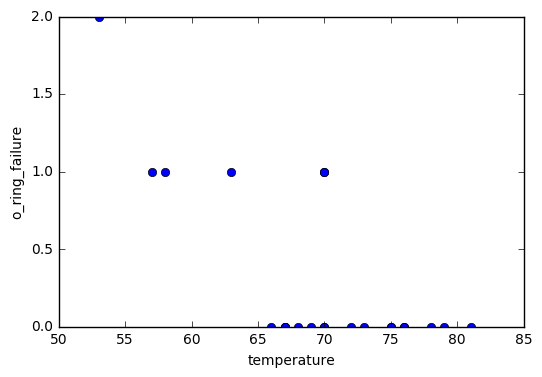

In [22]:
ax=plt.plot(temp,o_ring_failure,'o')
plt.ylabel("o_ring_failure")
plt.xlabel("temperature")

In [26]:
mean_o_ring_failure=challenger['O.ring.failures'].mean()

In [27]:
mean_o_ring_failure

0.30434782608695654

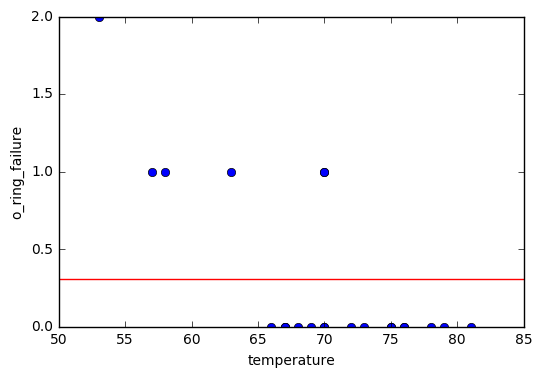

In [28]:
ax=plt.plot(temp,o_ring_failure,'o')
plt.ylabel("o_ring_failure")
plt.xlabel("temperature")
plt.axhline(mean_o_ring_failure,color='r',linestyle='-')
plt.show()

In [30]:
import statsmodels.api as sm
model=sm.OLS(temp,o_ring_failure).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Fri, 22 Jun 2018   Prob (F-statistic):             0.0402
Time:                        12:36:11   Log-Likelihood:                -128.07
No. Observations:                  23   AIC:                             258.1
Df Residuals:                      22   BIC:                             259.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
O.ring.failures    47.1111     21.605      2.181      0.040         2.304    91.918
==============================================================================
Omnibus:                       13.767   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.461
Skew:                          -1.591   Prob(JB):                      0.00197
Kurtosis:                       4.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pressure=challenger['pressure']

In [34]:
pressure

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

In [35]:
from statsmodels.graphics.regressionplots import abline_plot

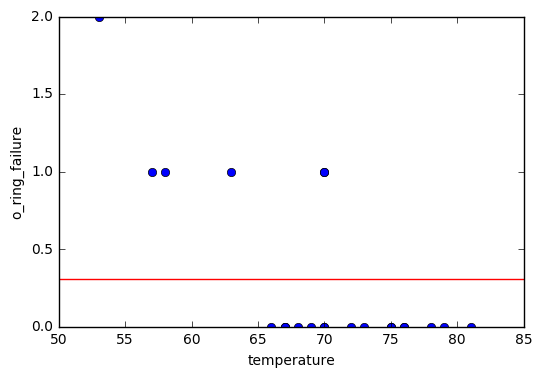

In [36]:
ax=plt.plot(temp,o_ring_failure,'o')
plt.ylabel("o_ring_failure")
plt.xlabel("temperature")
plt.axhline(mean_o_ring_failure,color='r',linestyle='-')
plt.show()

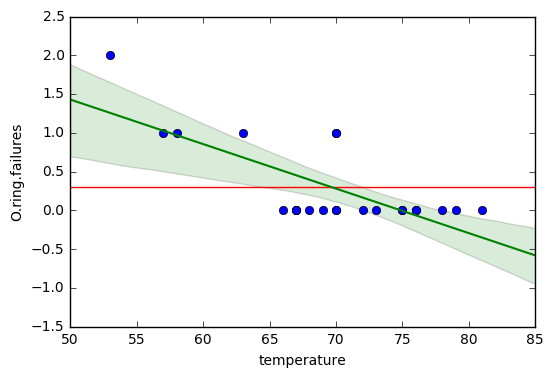

In [39]:
import seaborn as sns
ax=plt.plot(temp,o_ring_failure,'o')
plt.ylabel("o_ring_failure")
plt.xlabel("temperature")
plt.axhline(mean_o_ring_failure,color='r',linestyle='-')
sns.regplot(x='temperature',y='O.ring.failures',data=challenger)
plt.show()

In [38]:
!pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\26\0a\44\53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn


You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
from sklearn import linear_model
x=challenger['temperature']
x=x.reshape(1,-1)
y=challenger['O.ring.failures']
y=y.reshape(1,-1)

In [46]:
x

array([[66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70,
        81, 76, 79, 75, 76, 58]], dtype=int64)

In [47]:
y

array([[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [50]:
lm=linear_model.LinearRegression()
model=lm.fit(x,y)

In [52]:
predictions=lm.predict(x)
print(predictions)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  2.  0.  0.  0.  0.
   0.  0.  0.  0.  1.]]


In [ ]:
#model_multiple=lm.fit(y^x+z) z is pressure and multi